In [1]:
import numpy as np
import matplotlib.pyplot as plt

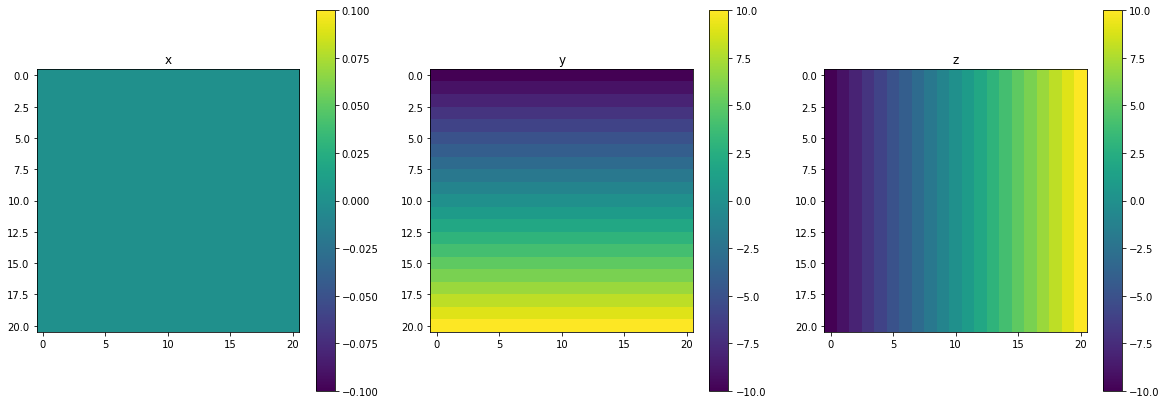

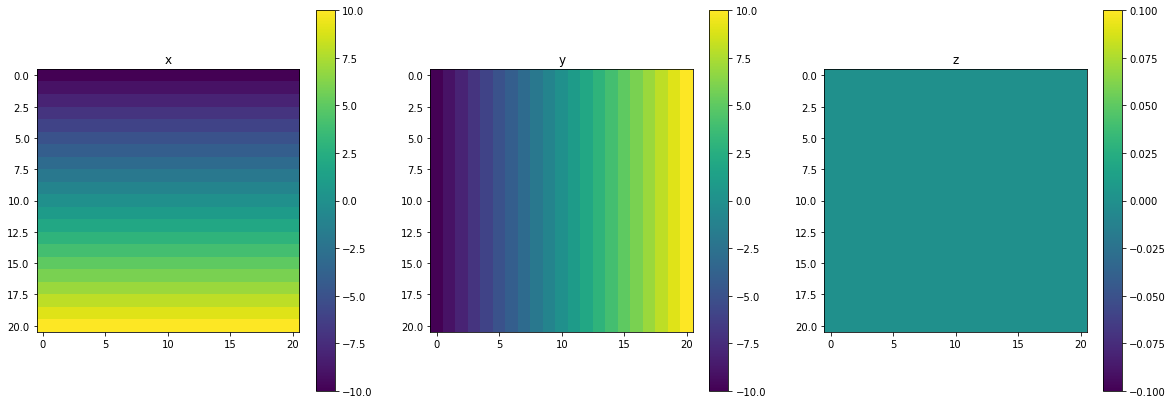

In [2]:
x1 = np.linspace(-10, 10, 20+1)
icent = 10
x, y, z = np.meshgrid(x1, x1, x1, indexing='ij')

plt.figure(figsize=(20,7))
plt.subplot(131)
plt.imshow(x[icent,:,:])
plt.title('x')
plt.colorbar()
plt.subplot(132)
plt.imshow(y[icent,:,:])
plt.title('y')
plt.colorbar()
plt.subplot(133)
plt.imshow(z[icent,:,:])
plt.title('z')
plt.colorbar()


plt.figure(figsize=(20,7))
plt.subplot(131)
plt.imshow(x[:,:,icent])
plt.title('x')
plt.colorbar()
plt.subplot(132)
plt.imshow(y[:,:,icent])
plt.title('y')
plt.colorbar()
plt.subplot(133)
plt.imshow(z[:,:,icent])
plt.title('z')
plt.colorbar()

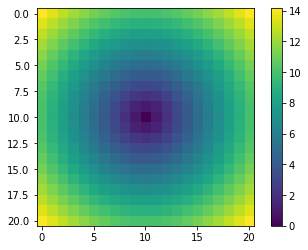

In [3]:
r = np.sqrt(x**2 + y**2 + z**2)
plt.imshow(r[icent,:,:])
plt.colorbar()

/opt/apps/pkgs/jupyterhub/lib64/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


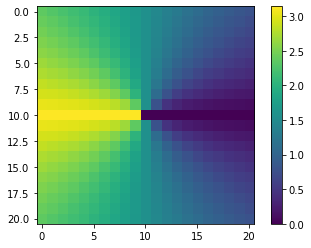

In [4]:
theta = np.arccos(z/r)
N = len(x1)
for ix in range(N):
    for iy in range(N):
        for iz in range(N):
            if r[ix,iy,iz]==0:
                theta[ix, iy, iz] = 0
plt.imshow(theta[icent,:,:])
plt.colorbar()

/opt/apps/pkgs/jupyterhub/lib64/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


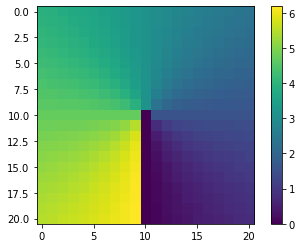

In [5]:
phi = np.arccos(x/np.sqrt(x**2 + y**2))
N = len(x1)
for ix in range(N):
    for iy in range(N):
        for iz in range(N):
            if y[ix,iy,iz]<0:
                phi[ix, iy, iz] = 2*np.pi - phi[ix, iy, iz]
            elif x[ix,iy,iz]==0 and y[ix,iy,iz]==0:
                phi[ix, iy, iz] = 0
plt.imshow(phi[:,:,icent])
plt.colorbar()

In [6]:
dxfacphi = phi % (np.pi/2)

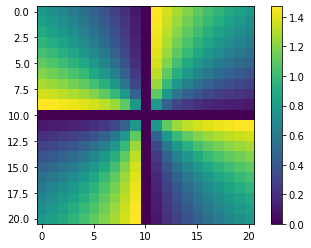

In [7]:
plt.imshow(dxfacphi[:,:,icent])
plt.colorbar()

In [3]:
import sys
sys.path.append("/users/munozr/mycodes")
sys.path.append("/Users/rlm36AA/mycodes")
import numpy as np
import matplotlib.pyplot as plt
from data_analysis_codes.tools import ReadingTools as RRead
from data_analysis_codes.tools import LinData
from data_analysis_codes.tools import TAradius

In [4]:
param = RRead.read_parameters('pflrw_d3e3_L1000_t3e2_N32_EdS_mK')
Lin = LinData.LinData_Class(param)
TAr = TAradius.TA_Class(param, Lin, [[8], [8], [8]])
N = param['Nx']

Error in loading parameter file, check that it's in
/home/robynm/simulations/pflrw_d3e3_L1000_t3e2_N32_EdS_mK/output-0000/pflrw_d3e3_L1000_t3e2_N32_EdS_mK.par
Or
/Users/robynmunoz/simulations/pflrw_d3e3_L1000_t3e2_N32_EdS_mK/output-0000/pflrw_d3e3_L1000_t3e2_N32_EdS_mK.par
Or
/mnt/lustre2/ET_sims/pflrw_d3e3_L1000_t3e2_N32_EdS_mK/output-0000/pflrw_d3e3_L1000_t3e2_N32_EdS_mK.par


cat: /home/robynm/simulations/pflrw_d3e3_L1000_t3e2_N32_EdS_mK/output-0000/pflrw_d3e3_L1000_t3e2_N32_EdS_mK.par: No such file or directory
cat: /Users/robynmunoz/simulations/pflrw_d3e3_L1000_t3e2_N32_EdS_mK/output-0000/pflrw_d3e3_L1000_t3e2_N32_EdS_mK.par: No such file or directory
cat: /mnt/lustre2/ET_sims/pflrw_d3e3_L1000_t3e2_N32_EdS_mK/output-0000/pflrw_d3e3_L1000_t3e2_N32_EdS_mK.par: No such file or directory


KeyError: 'xmax'

In [ ]:
err = np.zeros((N, N, N))
for ix in range(N):
    print(ix)
    for iy in range(N):
        for iz in range(N):
            r, theta, phi = TAr.get_Radius_of_grid_point((ix, iy, iz))
            x = -TAr.xOD + Lin.d1x[ix]
            y = -TAr.yOD + Lin.d1x[iy]
            z = -TAr.zOD + Lin.d1x[iz]
            if x>=TAr.L/2:
                x = x - TAr.L
            if y>=TAr.L/2:
                y = y - TAr.L
            if z>=TAr.L/2:
                z = z - TAr.L
            rth = TAr.radius(x, y, z)
            err[ix, iy, iz] = abs(r/rth - 1)

NameError: name 'err' is not defined

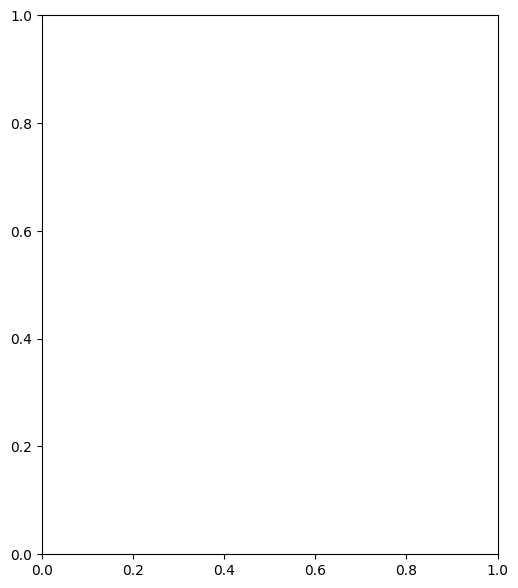

In [2]:
icent = 8
plt.figure(figsize=(20,7))
plt.subplot(131)
plt.imshow(err[icent,:,:])
plt.title('err')
plt.colorbar()
plt.subplot(132)
plt.imshow(err[:, icent,:])
plt.colorbar()
plt.subplot(133)
plt.imshow(err[:,:,icent])
plt.colorbar()

icent = 16
plt.figure(figsize=(20,7))
plt.subplot(131)
plt.imshow(err[icent,:,:])
plt.colorbar()
plt.subplot(132)
plt.imshow(err[:,icent,:])
plt.colorbar()
plt.subplot(133)
plt.imshow(err[:,:,icent])
plt.colorbar()

In [1]:
import sys
sys.path.append("/users/munozr/mycodes")
sys.path.append("/Users/rlm36AA/mycodes")
import numpy as np
import matplotlib.pyplot as plt
from data_analysis_codes.tools import lineint

In [5]:
L = 1000
Nx = 16
Ny = 18
Nz = 20
dx = L/N
LI = lineint.LineIntegrate([-500, 500, L/Nx], 
                           [-100, 900, L/Ny], 
                           [200, 1200, L/Nz],
                           [int(Nx/4), int(Ny/5), int(Nz/6)])

In [6]:
err = np.zeros((N, N, N))
for ix in range(N):
    print(ix)
    for iy in range(N):
        for iz in range(N):
            idx, seg, theta, phi = LI.segments_idx_end((ix, iy, iz))
            rnum = np.sum(seg)
            rth = LI.radius3D_idx(ix, iy, iz)
            err[ix, iy, iz] = abs(rnum/rth - 1)
print(np.nanmax(err))

0
1
2
3
4
5


/var/folders/qw/k_c451h55_346t71454cl33h0000gq/T/ipykernel_34658/3284767117.py:9: RuntimeWarning: invalid value encountered in scalar divide
  err[ix, iy, iz] = abs(rnum/rth - 1)


6
7
8
9
10
11
12
13
14
15
6.238422387006004e-06


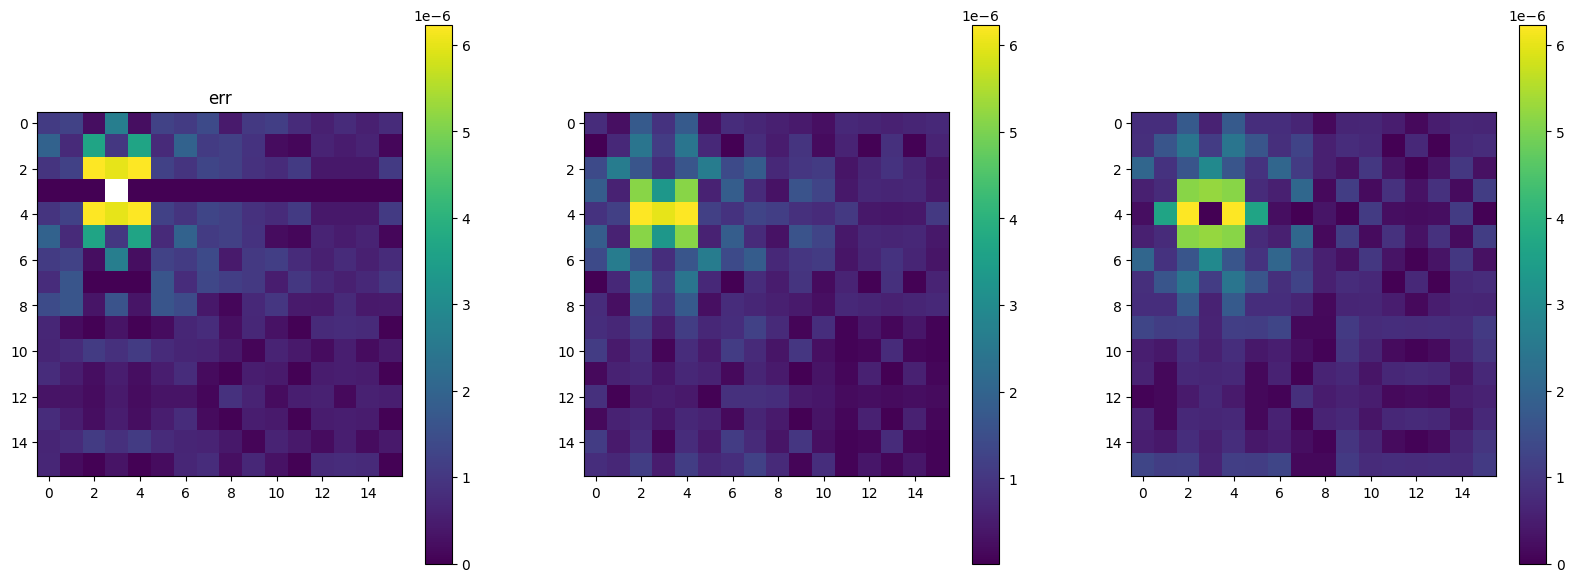

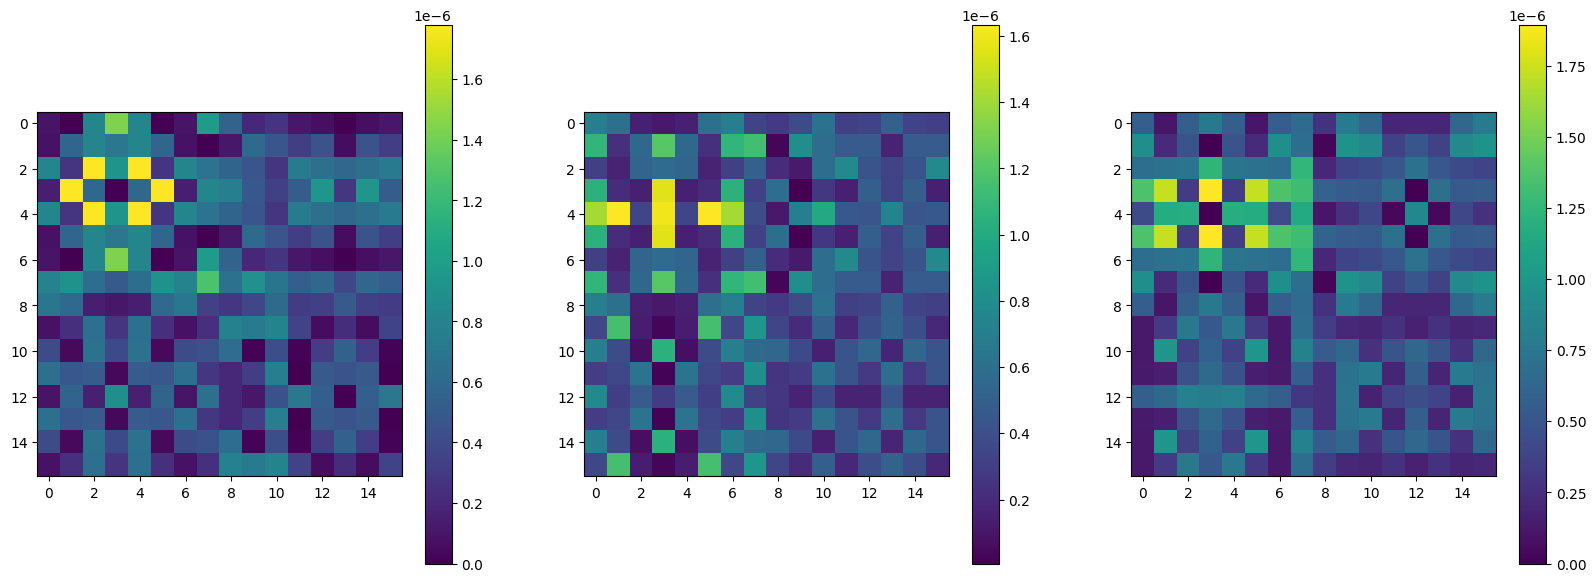

In [7]:
icent = 4
plt.figure(figsize=(20,7))
plt.subplot(131)
plt.imshow(err[icent,:,:])
plt.title('err')
plt.colorbar()
plt.subplot(132)
plt.imshow(err[:, icent,:])
plt.colorbar()
plt.subplot(133)
plt.imshow(err[:,:,icent])
plt.colorbar()

icent = 8
plt.figure(figsize=(20,7))
plt.subplot(131)
plt.imshow(err[icent,:,:])
plt.colorbar()
plt.subplot(132)
plt.imshow(err[:,icent,:])
plt.colorbar()
plt.subplot(133)
plt.imshow(err[:,:,icent])
plt.colorbar()

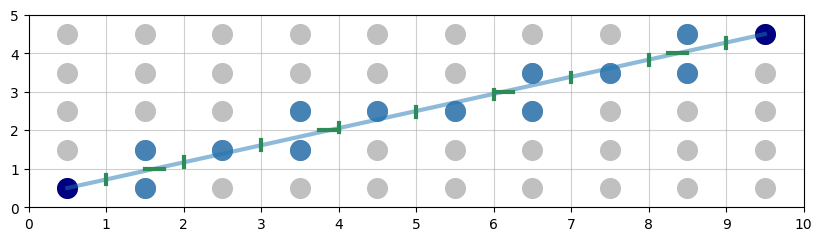

In [92]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 2.5))

major_ticks_top = np.linspace(0, 20, 21)
axes.set_xticks(major_ticks_top)
axes.set_yticks(major_ticks_top)
axes.grid(which="major", alpha=0.6)

ms = 200

lw = 3
plt.plot([0.5, 9.5], [0.5, 4.5], linewidth = lw, alpha = 0.5)

x = np.arange(10)+0.5
for i in range(5):
    plt.scatter(x, [i+0.5]*len(x), color='silver', s=ms)
plt.xlim(0, 10)
plt.ylim(0, 5)

end_color = 'navy'
plt.scatter(0.5, 0.5, color=end_color, s=ms)
plt.scatter(9.5, 4.5, color=end_color, s=ms)

plt.scatter(np.array([1, 1, 2, 3, 3, 4, 5, 6, 6, 7, 8, 8])+0.5, 
            np.array([0, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4])+0.5, color='steelblue', s=ms)

intersect_color = 'seagreen'
dy = 0.25
for i, y in enumerate([0.6, 1.05, 1.5, 1.95, 2.35, 2.8, 3.25, 3.7, 4.15]):
    plt.plot([i+1, i+1], [y, y+dy], color=intersect_color, linewidth = lw)
dx = 0.25
for i, x in enumerate([1.5, 3.75, 6, 8.25]):
    plt.plot([x, x+dx], [i+1, i+1], color=intersect_color, linewidth = lw)
plt.savefig('lineintegrate.pdf')